In [126]:
from pydataset import data
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.externals import joblib
from sklearn.metrics import accuracy_score, classification_report , confusion_matrix
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sn
%matplotlib inline

In [72]:
titanic_dataset = data('titanic')

In [73]:
titanic_dataset

,class,age,sex,survived
1,1st class,adults,man,yes
2,1st class,adults,man,yes
3,1st class,adults,man,yes
4,1st class,adults,man,yes
5,1st class,adults,man,yes
...,...,...,...,...
1312,3rd class,child,women,no
1313,3rd class,child,women,no
1314,3rd class,child,women,no
1315,3rd class,child,women,no


In [74]:
titanic = pd.get_dummies(titanic_dataset)

In [75]:
titanic

,class_1st class,class_2nd class,class_3rd class,age_adults,age_child,sex_man,sex_women,survived_no,survived_yes
1,1,0,0,1,0,1,0,0,1
2,1,0,0,1,0,1,0,0,1
3,1,0,0,1,0,1,0,0,1
4,1,0,0,1,0,1,0,0,1
5,1,0,0,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...
1312,0,0,1,0,1,0,1,1,0
1313,0,0,1,0,1,0,1,1,0
1314,0,0,1,0,1,0,1,1,0
1315,0,0,1,0,1,0,1,1,0


In [76]:
y = titanic['survived_yes']

In [77]:
titanic.drop('survived_no', axis=1, inplace=True)

In [78]:
X = titanic.drop('survived_yes', axis=1)

In [187]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [218]:
model = LogisticRegression(solver='liblinear',C=1.0, random_state=0)

In [219]:
model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=0, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False)

In [220]:
predictions = model.predict(X_test)

In [221]:
accuracy_score(y_test, predictions)

0.7575757575757576

In [222]:
model.score(X_test, y_test)

0.7575757575757576

In [223]:
cr = classification_report(y_test, predictions)

In [224]:
print(cr)

              precision    recall  f1-score   support

           0       0.78      0.86      0.82       169
           1       0.70      0.58      0.63        95

   micro avg       0.76      0.76      0.76       264
   macro avg       0.74      0.72      0.73       264
weighted avg       0.75      0.76      0.75       264



In [225]:
# check lables order
model.classes_

array([0, 1], dtype=uint8)

[[<matplotlib.axis.XTick at 0x15456b30>,
 [Text(0, 0, 'Predicted 0s'), Text(0, 0, 'Predicted 1s')]]

[[<matplotlib.axis.YTick at 0x15456e10>,
 [Text(0, 0, 'Actual 0s'), Text(0, 0, 'Actual 1s')]]

(1.5, -0.5)

Text(0, 0, '145')

Text(1, 0, '24')

Text(0, 1, '40')

Text(1, 1, '55')

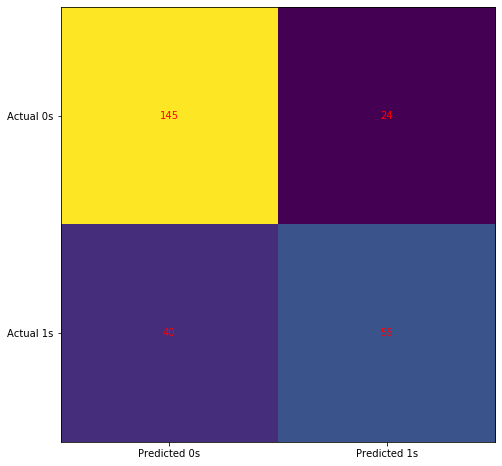

In [226]:
cm = confusion_matrix(y_test, predictions, labels=[0,1])

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()

In [227]:
print(cm)

[[145  24]
 [ 40  55]]


In [228]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
for i in model.predict_proba(X):
    print(i)

[0.58921377 0.41078623]
[0.58921377 0.41078623]
[0.58921377 0.41078623]
[0.58921377 0.41078623]
[0.58921377 0.41078623]
[0.58921377 0.41078623]
[0.58921377 0.41078623]
[0.58921377 0.41078623]
[0.58921377 0.41078623]
[0.58921377 0.41078623]
[0.58921377 0.41078623]
[0.58921377 0.41078623]
[0.58921377 0.41078623]
[0.58921377 0.41078623]
[0.58921377 0.41078623]
[0.58921377 0.41078623]
[0.58921377 0.41078623]
[0.58921377 0.41078623]
[0.58921377 0.41078623]
[0.58921377 0.41078623]
[0.58921377 0.41078623]
[0.58921377 0.41078623]
[0.58921377 0.41078623]
[0.58921377 0.41078623]
[0.58921377 0.41078623]
[0.58921377 0.41078623]
[0.58921377 0.41078623]
[0.58921377 0.41078623]
[0.58921377 0.41078623]
[0.58921377 0.41078623]
[0.58921377 0.41078623]
[0.58921377 0.41078623]
[0.58921377 0.41078623]
[0.58921377 0.41078623]
[0.58921377 0.41078623]
[0.58921377 0.41078623]
[0.58921377 0.41078623]
[0.58921377 0.41078623]
[0.58921377 0.41078623]
[0.58921377 0.41078623]
[0.58921377 0.41078623]
[0.58921377 0.41

[0.88967613 0.11032387]
[0.88967613 0.11032387]
[0.88967613 0.11032387]
[0.88967613 0.11032387]
[0.88967613 0.11032387]
[0.88967613 0.11032387]
[0.88967613 0.11032387]
[0.88967613 0.11032387]
[0.88967613 0.11032387]
[0.88967613 0.11032387]
[0.88967613 0.11032387]
[0.88967613 0.11032387]
[0.88967613 0.11032387]
[0.88967613 0.11032387]
[0.88967613 0.11032387]
[0.88967613 0.11032387]
[0.88967613 0.11032387]
[0.88967613 0.11032387]
[0.88967613 0.11032387]
[0.88967613 0.11032387]
[0.88967613 0.11032387]
[0.88967613 0.11032387]
[0.88967613 0.11032387]
[0.88967613 0.11032387]
[0.88967613 0.11032387]
[0.88967613 0.11032387]
[0.88967613 0.11032387]
[0.88967613 0.11032387]
[0.88967613 0.11032387]
[0.88967613 0.11032387]
[0.88967613 0.11032387]
[0.88967613 0.11032387]
[0.88967613 0.11032387]
[0.88967613 0.11032387]
[0.88967613 0.11032387]
[0.88967613 0.11032387]
[0.88967613 0.11032387]
[0.88967613 0.11032387]
[0.88967613 0.11032387]
[0.88967613 0.11032387]
[0.88967613 0.11032387]
[0.88967613 0.11